In [1]:
#imports
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime
import shap
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler # Import for standard scaling of the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # Import train_test_split function
import json
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('src/ObesityDataSet_raw_and_data_sinthetic.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [3]:
# height and weight highly correlated to BMI (target based)
data = data.drop(columns=['Height', 'Weight'])

In [4]:
data.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
columns = ["Gender", "family_history_with_overweight", "FAVC", 
           "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]
for col in columns:
    data[col] = data[col].astype('category')
    
data_enc = data.copy()

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

category = ['Gender','family_history_with_overweight', 'FAVC', 'CAEC',
           'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
encoder_list = []
for c in category:
    encoder = LabelEncoder()
    data_enc[c] = encoder.fit_transform(data_enc[c])
    encoder_list.append(encoder)
    
# for i in range(len(encoder_list)):
#     cat = category[i]
#     encoder = encoder_list[i]
#     data_enc[cat] = encoder.inverse_transform(data_enc[cat])
data_enc

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


In [7]:
X, y = data_enc.iloc[:,:-1], data_enc.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=1) 

In [8]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score', accuracy)

Accuracy score 0.7446808510638298


In [10]:
y_test_inv = encoder_list[-1].inverse_transform(y_test)
y_pred_inv = encoder_list[-1].inverse_transform(y_pred)
print(classification_report(y_test_inv,y_pred_inv))

                     precision    recall  f1-score   support

Insufficient_Weight       0.79      0.87      0.83        61
      Normal_Weight       0.50      0.51      0.51        45
     Obesity_Type_I       0.85      0.67      0.75        79
    Obesity_Type_II       0.85      0.87      0.86        54
   Obesity_Type_III       0.98      0.98      0.98        63
 Overweight_Level_I       0.64      0.57      0.60        61
Overweight_Level_II       0.56      0.70      0.62        60

           accuracy                           0.74       423
          macro avg       0.74      0.74      0.74       423
       weighted avg       0.75      0.74      0.75       423



In [20]:
type(y_test)

pandas.core.series.Series

In [21]:
for i in range(len(y_pred)):
    print(y_pred[i], y_pred_inv[i], y_test.iloc[i])

0 Insufficient_Weight 0
0 Insufficient_Weight 1
0 Insufficient_Weight 5
4 Obesity_Type_III 4
3 Obesity_Type_II 3
4 Obesity_Type_III 4
0 Insufficient_Weight 2
4 Obesity_Type_III 4
6 Overweight_Level_II 2
2 Obesity_Type_I 2
5 Overweight_Level_I 1
3 Obesity_Type_II 3
5 Overweight_Level_I 2
1 Normal_Weight 2
5 Overweight_Level_I 5
2 Obesity_Type_I 2
5 Overweight_Level_I 5
3 Obesity_Type_II 3
1 Normal_Weight 0
6 Overweight_Level_II 6
5 Overweight_Level_I 2
2 Obesity_Type_I 2
1 Normal_Weight 6
3 Obesity_Type_II 2
2 Obesity_Type_I 2
2 Obesity_Type_I 2
1 Normal_Weight 2
5 Overweight_Level_I 5
6 Overweight_Level_II 6
3 Obesity_Type_II 3
2 Obesity_Type_I 2
4 Obesity_Type_III 4
6 Overweight_Level_II 6
6 Overweight_Level_II 5
0 Insufficient_Weight 0
2 Obesity_Type_I 2
0 Insufficient_Weight 0
0 Insufficient_Weight 0
5 Overweight_Level_I 6
5 Overweight_Level_I 6
1 Normal_Weight 1
2 Obesity_Type_I 2
5 Overweight_Level_I 5
1 Normal_Weight 1
0 Insufficient_Weight 0
4 Obesity_Type_III 4
0 Insufficient_W

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

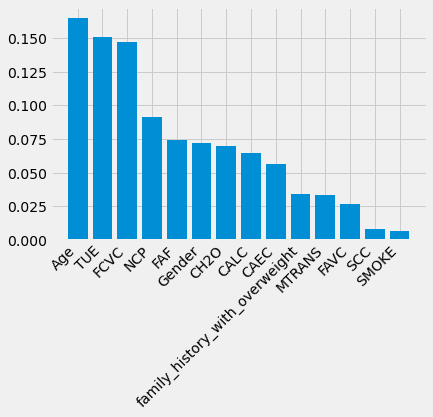

In [12]:
# Gets the gini importance
feature_imp = pd.Series(model.feature_importances_, 
                        index=X.columns).sort_values(ascending=False)
plt.bar(feature_imp.index, feature_imp)
plt.xticks(rotation=45, horizontalalignment='right')

In [14]:
feature_imp

Age                               0.174722
TUE                               0.154082
FCVC                              0.151851
NCP                               0.086072
FAF                               0.073122
Gender                            0.065368
CH2O                              0.062377
CALC                              0.061158
CAEC                              0.057795
family_history_with_overweight    0.035627
MTRANS                            0.032071
FAVC                              0.029203
SCC                               0.012099
SMOKE                             0.004454
dtype: float64

# SHAP

In [13]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [14]:
shap_values2 = explainer(X_test)

In [40]:
np.shape(shap_values2)

(423, 14, 7)

In [49]:
shap_values2

.values =
array([[[ 2.90685456e-02, -5.33183182e-03,  4.77926885e-03, ...,
         -9.85238361e-02, -1.94627538e-02,  4.08861732e-02],
        [ 2.55247831e-01,  1.06376263e-01, -1.54361759e-02, ...,
         -5.85614426e-04, -1.00725757e-01, -1.41693204e-01],
        [ 2.58307636e-01, -1.27553032e-01, -6.53435378e-02, ...,
          0.00000000e+00, -1.01560933e-02, -4.49262904e-02],
        ...,
        [-2.53688719e-02, -3.68236518e-02,  2.06460428e-03, ...,
          4.20081171e-02, -1.74440821e-02,  3.69900080e-02],
        [-3.90640736e-02,  2.57280701e-02, -5.94381429e-03, ...,
          6.78078778e-06,  2.65278474e-02, -2.55867912e-03],
        [-2.37354408e-02,  5.05287130e-03, -1.65860304e-03, ...,
          1.18483412e-04, -5.21351964e-04,  1.08424920e-02]],

       [[ 1.41176755e-01, -1.38206114e-01,  8.41456382e-03, ...,
         -5.06181327e-02, -1.36792923e-02,  1.90896347e-02],
        [ 3.15476416e-01,  1.71749047e-02,  2.60103126e-02, ...,
         -8.61038192e-04, -2

In [47]:
shap_values[0]

array([[ 0.02906855,  0.25524783,  0.25830764, ..., -0.02536887,
        -0.03906407, -0.02373544],
       [ 0.14117675,  0.31547642,  0.04297988, ...,  0.05140714,
        -0.03534077, -0.01110776],
       [ 0.16283674,  0.1027566 ,  0.03348516, ...,  0.02533197,
        -0.01473882,  0.20829625],
       ...,
       [ 0.00037475, -0.01168739, -0.0291283 , ...,  0.00443927,
        -0.02232119, -0.00097559],
       [ 0.009101  ,  0.19628061, -0.01548427, ...,  0.06099709,
         0.01557732, -0.00079871],
       [ 0.03175473, -0.09793271, -0.02737152, ..., -0.02430742,
         0.00269072,  0.00933725]])

In [16]:
np.shape(shap_values)

(7, 2111, 14)

## Local

In [17]:
sample = 420

In [28]:
X_test.iloc[sample:sample+1,:]

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
11,0,21.0,1,1,2.0,3.0,1,0,2.0,1,2.0,1.0,2,3


In [29]:
y_test.iloc[sample]

6

In [30]:
y_test

553     0
331     1
241     5
1957    4
1691    3
       ..
1201    6
363     1
11      6
510     0
1711    3
Name: NObeyesdad, Length: 423, dtype: int64

In [65]:
shap_values2.base_values[0]

array([0.125     , 0.14336493, 0.16113744, 0.14395735, 0.15462085,
       0.13566351, 0.13625592])

In [31]:
encoder_list[-1].inverse_transform(y_test.iloc[sample:sample+1])

array(['Overweight_Level_II'], dtype=object)

In [22]:
np.shape(shap_values)

(7, 2111, 14)

In [52]:
np.shape(explainer.base_value)

AttributeError: 'Tree' object has no attribute 'base_value'

In [24]:
explainer.expected_value

array([0.125     , 0.14336493, 0.16113744, 0.14395735, 0.15462085,
       0.13566351, 0.13625592])

In [25]:
shap_values[6][sample,:]

array([ 0.02089176, -0.02938207, -0.00863773, -0.01463725, -0.03012357,
       -0.00854871,  0.00642503,  0.00013923,  0.00311025,  0.00612156,
       -0.01835349, -0.02017099, -0.00779844, -0.0352915 ])

In [48]:
shap.initjs()
value = y.iloc[sample]
print('Target value', value)

shap.force_plot(shap_values2, 
                shap_values[value][sample,:], X_test.iloc[sample,:])


Target value 0


In [121]:
shap_values2.data[sample:sample+1,:].shape

(1, 14)

In [127]:
shap_values2.values[sample:sample+1,:][:,:,value].shape

(1, 14)

In [129]:
shap_values2

.values =
array([[[ 2.90685456e-02, -5.33183182e-03,  4.77926885e-03, ...,
         -9.85238361e-02, -1.94627538e-02,  4.08861732e-02],
        [ 2.55247831e-01,  1.06376263e-01, -1.54361759e-02, ...,
         -5.85614426e-04, -1.00725757e-01, -1.41693204e-01],
        [ 2.58307636e-01, -1.27553032e-01, -6.53435378e-02, ...,
          0.00000000e+00, -1.01560933e-02, -4.49262904e-02],
        ...,
        [-2.53688719e-02, -3.68236518e-02,  2.06460428e-03, ...,
          4.20081171e-02, -1.74440821e-02,  3.69900080e-02],
        [-3.90640736e-02,  2.57280701e-02, -5.94381429e-03, ...,
          6.78078778e-06,  2.65278474e-02, -2.55867912e-03],
        [-2.37354408e-02,  5.05287130e-03, -1.65860304e-03, ...,
          1.18483412e-04, -5.21351964e-04,  1.08424920e-02]],

       [[ 1.41176755e-01, -1.38206114e-01,  8.41456382e-03, ...,
         -5.06181327e-02, -1.36792923e-02,  1.90896347e-02],
        [ 3.15476416e-01,  1.71749047e-02,  2.60103126e-02, ...,
         -8.61038192e-04, -2

In [28]:
sample = 6
shap.initjs()
value = y_test.iloc[sample]
pred_val = y_pred_inv[sample]
pred_val_int = y_pred[sample]



print('base value', shap_values2.base_values[0][value])
print('shap_values', shap_values2.values[sample:sample+1,:][:,:,value])
print('feature values', shap_values2.data[sample:sample+1,:])
print('Target value', value)
print('Predicted value', pred_val, pred_val_int)


shap.force_plot(shap_values2.base_values[0][value], 
                shap_values2.values[sample:sample+1,:][:,:,value], 
                shap_values2.data[sample:sample+1,:])

base value 0.16113744075829384
shap_values [[ 1.33994141e-02  2.75088184e-02  2.85361129e-02  3.46430817e-03
  -9.74729523e-02 -1.87764815e-03  1.60521651e-02 -1.68660764e-04
   4.02560523e-03 -8.70187464e-05 -7.60748775e-03 -2.07024835e-02
  -1.45788593e-02 -1.11628754e-01]]
feature values [[ 1.       25.994393  1.        1.        3.        3.        2.
   0.        1.776991  0.        1.757724  0.        2.        0.      ]]
Target value 2
Predicted value Insufficient_Weight 0


In [348]:
shap_values[0].values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [49]:
shap_values2.data[sample:sample+1,:]

array([[ 1.      , 25.994393,  1.      ,  1.      ,  3.      ,  3.      ,
         2.      ,  0.      ,  1.776991,  0.      ,  1.757724,  0.      ,
         2.      ,  0.      ]])

In [69]:
shap_values2.base_values[0][value]

array([0.125     , 0.14336493, 0.16113744, 0.14395735, 0.15462085,
       0.13566351, 0.13625592])

In [76]:
# the waterfall_plot shows how we get from 
# shap_values.base_values to model.predict(X)[sample_ind]
sample = 6
shap.initjs()
value = y_test.iloc[sample]
pred_val = y_pred_inv[sample]
pred_val_int = y_pred[sample]



print('base value', shap_values2.base_values[0][value])
print('shap_values', shap_values2.values[sample:sample+1,:][:,:,value])
print('feature values', shap_values2.data[sample:sample+1,:])
print('Target value', value)
print('Predicted value', pred_val, pred_val_int)

shap.waterfall_plot(ex)

base value 0.16113744075829384
shap_values [[ 1.33994141e-02  2.75088184e-02  2.85361129e-02  3.46430817e-03
  -9.74729523e-02 -1.87764815e-03  1.60521651e-02 -1.68660764e-04
   4.02560523e-03 -8.70187464e-05 -7.60748775e-03 -2.07024835e-02
  -1.45788593e-02 -1.11628754e-01]]
feature values [[ 1.       25.994393  1.        1.        3.        3.        2.
   0.        1.776991  0.        1.757724  0.        2.        0.      ]]
Target value 2
Predicted value Insufficient_Weight 0


AttributeError: 'numpy.ndarray' object has no attribute 'base_values'

In [ ]:
shap.p

AttributeError: 'numpy.ndarray' object has no attribute 'values'

## Global

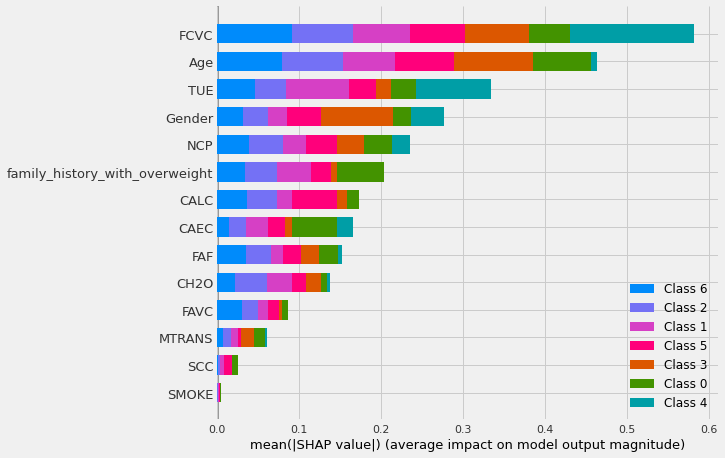

In [33]:
shap.summary_plot(shap_values, X)

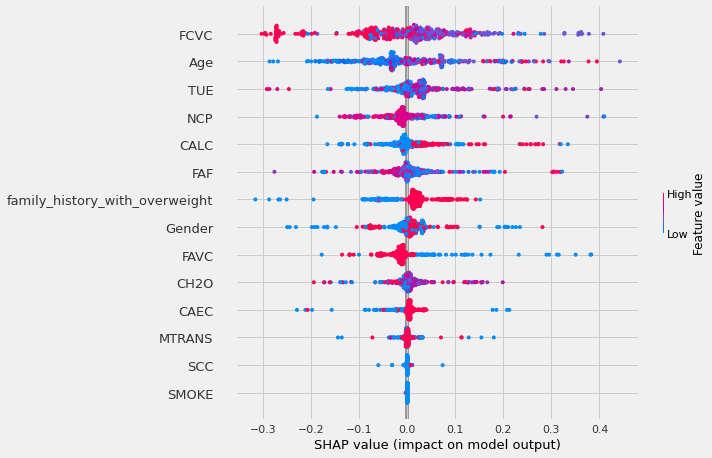

In [36]:
shap.summary_plot(shap_values[6], X_test.values, feature_names = X_test.columns)